In [3]:
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
from transformers import pipeline

In [4]:
df = pd.read_csv('App_Review_Data/PlayStoreDf.csv')

In [5]:
df.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,9c55021d-05c8-4655-879b-35dfba4949ba,Joe Miller,https://play-lh.googleusercontent.com/a/AItbvm...,Wouldn't let me see anything past 'download ar...,1,0,NaN,2022-09-03 04:18:47,NaN,NaN
1,1,a4b5544e-848d-4a16-8f03-ba549688056c,Thomas Steiner,https://play-lh.googleusercontent.com/a/AItbvm...,No filtering?? This app is useless without fil...,2,0,22.10.0,2022-08-16 02:04:50,NaN,NaN
2,2,cac1f8af-0724-4b78-a529-26cbacf60948,Mike Jones,https://play-lh.googleusercontent.com/a-/AFdZu...,Facebook sign in is broken.,1,0,22.10.0,2022-08-13 22:45:39,NaN,NaN
3,3,ca941bc6-c471-4169-a508-d7fc53fbcd04,David W.,https://play-lh.googleusercontent.com/a-/AFdZu...,Free and good so far...,5,0,22.10.0,2022-08-05 23:03:43,NaN,NaN
4,4,f059a575-c8df-4383-bf9c-fb45fc531566,Joseph States,https://play-lh.googleusercontent.com/a-/AFdZu...,Need timely updates! The new trails show up on...,5,0,22.10.0,2022-08-04 02:55:30,NaN,NaN


In [6]:
df['score'].mean()

3.809315866084425

In [7]:
df['reviewCreatedVersion'].value_counts()

3.2.8      83
3.2.1      57
3.2.6      54
21.14.0    52
3.2.5      52
3.4.0      49
3.1.1      48
3.11.0     42
3.2.4      24
3.13.1     23
22.10.0    22
3.8.0      22
1.25       19
3.12.2     18
3.1.0      18
3.10.0     11
3.3.1       9
3.5.2       7
3.12.1      6
3.2.7       5
3.6.2       3
3.2.0       3
1.22        2
3.7.0       2
3.5.0       2
3.0.1       1
1.2         1
1.11        1
Name: reviewCreatedVersion, dtype: int64

In [8]:
sentiment = pipeline('sentiment-analysis', model='siebert/sentiment-roberta-large-english')

In [11]:
print(sentiment('the app was amazing'))

[{'label': 'POSITIVE', 'score': 0.9987502098083496}]


In [13]:
for i in range(5):
    print(sentiment(str(df['content'][i])))

[{'label': 'NEGATIVE', 'score': 0.9994655251502991}]
[{'label': 'NEGATIVE', 'score': 0.9887871146202087}]
[{'label': 'NEGATIVE', 'score': 0.9994970560073853}]
[{'label': 'POSITIVE', 'score': 0.997767448425293}]
[{'label': 'POSITIVE', 'score': 0.9967235922813416}]


In [14]:
# converting content type to string
df['content'] = df['content'].astype('str')

In [16]:
df['result'] = df['content'].apply(lambda x: sentiment(x))

In [17]:
df

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,result
0,0,9c55021d-05c8-4655-879b-35dfba4949ba,Joe Miller,https://play-lh.googleusercontent.com/a/AItbvm...,Wouldn't let me see anything past 'download ar...,1,0,NaN,2022-09-03 04:18:47,NaN,NaN,"[{'label': 'NEGATIVE', 'score': 0.999465525150..."
1,1,a4b5544e-848d-4a16-8f03-ba549688056c,Thomas Steiner,https://play-lh.googleusercontent.com/a/AItbvm...,No filtering?? This app is useless without fil...,2,0,22.10.0,2022-08-16 02:04:50,NaN,NaN,"[{'label': 'NEGATIVE', 'score': 0.988787114620..."
2,2,cac1f8af-0724-4b78-a529-26cbacf60948,Mike Jones,https://play-lh.googleusercontent.com/a-/AFdZu...,Facebook sign in is broken.,1,0,22.10.0,2022-08-13 22:45:39,NaN,NaN,"[{'label': 'NEGATIVE', 'score': 0.999497056007..."
3,3,ca941bc6-c471-4169-a508-d7fc53fbcd04,David W.,https://play-lh.googleusercontent.com/a-/AFdZu...,Free and good so far...,5,0,22.10.0,2022-08-05 23:03:43,NaN,NaN,"[{'label': 'POSITIVE', 'score': 0.997767448425..."
4,4,f059a575-c8df-4383-bf9c-fb45fc531566,Joseph States,https://play-lh.googleusercontent.com/a-/AFdZu...,Need timely updates! The new trails show up on...,5,0,22.10.0,2022-08-04 02:55:30,NaN,NaN,"[{'label': 'POSITIVE', 'score': 0.996723592281..."
...,...,...,...,...,...,...,...,...,...,...,...,...
682,682,f10da1fe-0841-47ae-8010-4d875d6e00d5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Impressive content - broad and accurate,5,0,1.22,2015-11-11 23:16:56,NaN,NaN,"[{'label': 'POSITIVE', 'score': 0.998833477497..."
683,683,bd7fac23-c70e-4279-933d-200ef37287ea,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Great for looking at nearby trails and for che...,5,3,1.22,2015-10-19 07:24:24,NaN,NaN,"[{'label': 'POSITIVE', 'score': 0.998914122581..."
684,684,6f707a5d-a2e5-4a88-b485-983b27f5afd1,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Give it time!,4,1,1.2,2015-08-14 22:18:43,NaN,NaN,"[{'label': 'POSITIVE', 'score': 0.984198570251..."
685,685,b3505397-5163-4bb7-9a2f-6ad711bd0850,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"It's a shame, their climbing app is great.",3,0,1.11,2015-07-31 04:10:58,NaN,NaN,"[{'label': 'POSITIVE', 'score': 0.989862799644..."


In [18]:
df['r_label'] = df['result'].apply(lambda x: (x[0]['label']))
df['r_score'] = df['result'].apply(lambda x: (x[0]['score']))

In [20]:
df = df.drop(columns=['Unnamed: 0','result'])

In [21]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,r_label,r_score
0,9c55021d-05c8-4655-879b-35dfba4949ba,Joe Miller,https://play-lh.googleusercontent.com/a/AItbvm...,Wouldn't let me see anything past 'download ar...,1,0,NaN,2022-09-03 04:18:47,NaN,NaN,NEGATIVE,0.999466
1,a4b5544e-848d-4a16-8f03-ba549688056c,Thomas Steiner,https://play-lh.googleusercontent.com/a/AItbvm...,No filtering?? This app is useless without fil...,2,0,22.10.0,2022-08-16 02:04:50,NaN,NaN,NEGATIVE,0.988787
2,cac1f8af-0724-4b78-a529-26cbacf60948,Mike Jones,https://play-lh.googleusercontent.com/a-/AFdZu...,Facebook sign in is broken.,1,0,22.10.0,2022-08-13 22:45:39,NaN,NaN,NEGATIVE,0.999497
3,ca941bc6-c471-4169-a508-d7fc53fbcd04,David W.,https://play-lh.googleusercontent.com/a-/AFdZu...,Free and good so far...,5,0,22.10.0,2022-08-05 23:03:43,NaN,NaN,POSITIVE,0.997767
4,f059a575-c8df-4383-bf9c-fb45fc531566,Joseph States,https://play-lh.googleusercontent.com/a-/AFdZu...,Need timely updates! The new trails show up on...,5,0,22.10.0,2022-08-04 02:55:30,NaN,NaN,POSITIVE,0.996724
...,...,...,...,...,...,...,...,...,...,...,...,...
682,f10da1fe-0841-47ae-8010-4d875d6e00d5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Impressive content - broad and accurate,5,0,1.22,2015-11-11 23:16:56,NaN,NaN,POSITIVE,0.998833
683,bd7fac23-c70e-4279-933d-200ef37287ea,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Great for looking at nearby trails and for che...,5,3,1.22,2015-10-19 07:24:24,NaN,NaN,POSITIVE,0.998914
684,6f707a5d-a2e5-4a88-b485-983b27f5afd1,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Give it time!,4,1,1.2,2015-08-14 22:18:43,NaN,NaN,POSITIVE,0.984199
685,b3505397-5163-4bb7-9a2f-6ad711bd0850,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"It's a shame, their climbing app is great.",3,0,1.11,2015-07-31 04:10:58,NaN,NaN,POSITIVE,0.989863


In [22]:
df.to_csv('outfile.csv')

In [23]:
# review mean 
df['score'].mean()

3.809315866084425

In [24]:
# count of positive and neagtive reviews
df['r_label'].value_counts()

POSITIVE    468
NEGATIVE    219
Name: r_label, dtype: int64

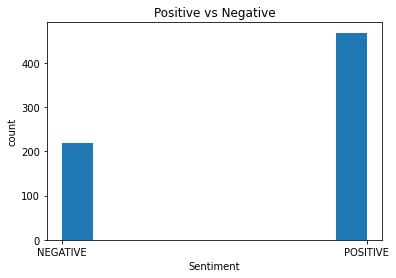

In [25]:
#graph
x = df['r_label']
plt.hist(x)
plt.xlabel('Sentiment')
plt.ylabel('count')
plt.title('Positive vs Negative')
plt.show()